# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import warnings
from google.colab import drive

In [ ]:
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
pd.set_option('float_format', '{:f}'.format)
drive.mount('/Python_reboot_da/')

%cd "/Python_reboot_da/MyDrive/Python_reboot_da"
%ls

In [3]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan
1,49,NaN,Mega,81,0.000000,0.000000,0.000000,0.000000,3272.936700,0,0.000000,0.000000,3272.936700,4280.196000,4716.127317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,28.762952
2,56,NaN,Mega,81,0.000000,0.000000,0.000000,0.000000,6249.755000,6,5128.020000,0.000000,6249.755000,10311.658800,10239.601283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.000000,0.000000,0.000000,0.000000,14354.937000,0,0.000000,0.000000,14354.937000,15086.799900,13905.841283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,364.008556
4,74,NaN,Mega,81,0.000000,0.000000,0.000000,0.000000,91511.769100,0,0.000000,0.000000,91511.769100,93649.440600,96089.612758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,6651.416562


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

Получается, что в выгрузке можно вывести 3 категориальных признака: возраст, пол, тип/размер города. Остальные признаки вещественные.
# Рассмотрим категориальные признаки (возраст, пол, тип/размер города)

In [5]:
df.gender.value_counts()

М    25403
F    23874
Name: gender, dtype: int64

In [6]:
df.city_type.value_counts()

<100        15421
100-500     10727
Mega         8954
1M+          7908
500-1000     6990
Name: city_type, dtype: int64

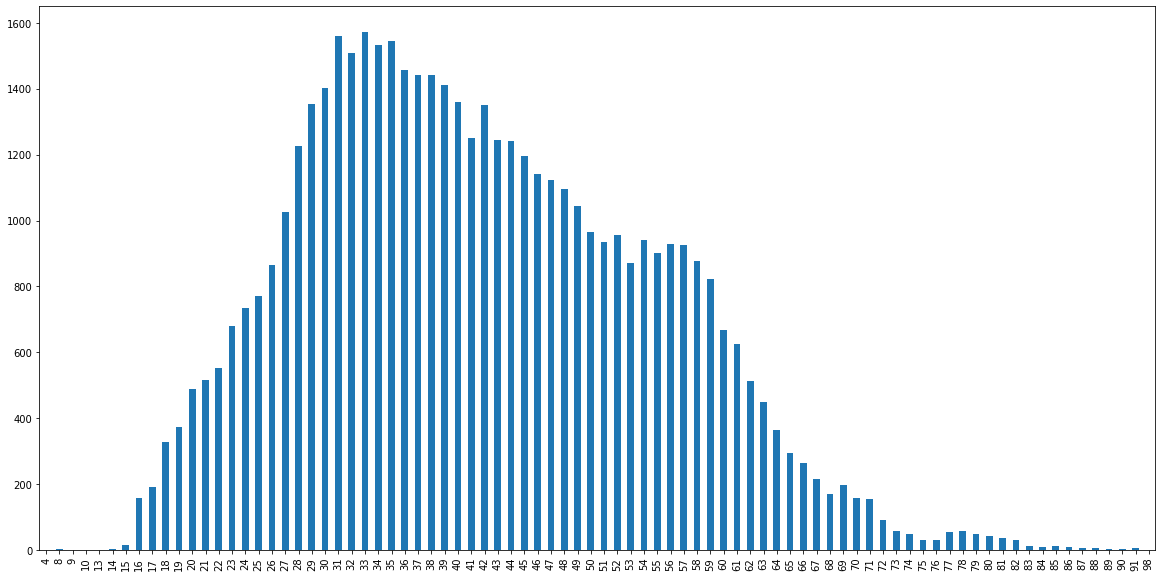

In [7]:
plt.figure(figsize=(20,10))
df.age.value_counts().sort_index().plot(kind='bar')
plt.show()

# Рассмотрим корреляцию между признаками

In [8]:
df.corr()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
age,1.000000,0.278095,0.005730,0.003346,0.010135,0.049813,0.026663,-0.117706,0.030522,0.009509,0.025446,0.023567,0.023617,0.071801,0.050881,0.072454,0.012036,0.011414,0.017393,0.006262,0.004197,0.011367,-0.041340,0.103702,0.000874,0.061660
full_mob,0.278095,1.000000,0.066694,0.095045,0.130913,0.013962,0.011671,0.067083,0.114933,0.010622,0.011193,0.010020,0.011621,0.020460,0.013657,0.016756,0.129737,0.138456,0.147058,0.096175,0.100781,0.112798,0.032183,0.032694,-0.005283,0.110472
ml_balance,0.005730,0.066694,1.000000,0.001244,0.658112,-0.002642,-0.001646,-0.020220,-0.009454,0.000373,-0.001340,-0.001223,-0.001177,-0.003975,-0.002759,-0.004150,0.681781,0.637054,0.711416,0.000881,0.000842,0.001720,0.389744,0.005684,-0.000557,0.092858
cl_balance_0m,0.003346,0.095045,0.001244,1.000000,0.733257,-0.011878,-0.005663,0.078812,0.086093,0.028787,-0.006754,-0.003508,-0.004916,-0.017783,-0.012148,-0.017697,0.686226,0.721025,0.591382,0.960047,0.985302,0.901052,0.185143,0.036264,-0.002494,0.378223
loan_balance_0m,0.010135,0.130913,0.658112,0.733257,1.000000,-0.011178,-0.005749,0.046519,0.069562,0.022902,-0.006366,-0.003762,-0.004773,-0.016743,-0.011486,-0.016874,0.979519,0.977384,0.932125,0.705331,0.722479,0.664858,0.425271,0.041081,0.001041,0.369049
td_balance_0m,0.049813,0.013962,-0.002642,-0.011878,-0.011178,1.000000,0.664375,-0.002052,0.080094,0.002913,0.674065,0.713126,0.536430,0.905467,0.995067,0.872002,-0.010844,-0.011568,-0.011226,-0.011730,-0.012242,-0.012762,-0.010313,0.046300,0.000233,0.574840
casa_balance_0m,0.026663,0.011671,-0.001646,-0.005663,-0.005749,0.664375,1.000000,0.029812,0.181762,0.008150,0.988638,0.972726,0.919708,0.563053,0.664602,0.686538,-0.006160,-0.005972,-0.006484,-0.006419,-0.005950,-0.007107,-0.004515,0.054488,-0.000507,0.769899
dc_trx_cnt,-0.117706,0.067083,-0.020220,0.078812,0.046519,-0.002052,0.029812,1.000000,0.477753,0.038176,0.023201,0.026599,0.029616,-0.002726,-0.001932,-0.003846,0.039649,0.048097,0.028076,0.073563,0.079771,0.064011,-0.012612,-0.147866,-0.008283,0.057233
dc_trx_sum,0.030522,0.114933,-0.009454,0.086093,0.069562,0.080094,0.181762,0.477753,1.000000,0.057170,0.166483,0.172687,0.190267,0.098957,0.080898,0.094113,0.062380,0.073891,0.053536,0.081869,0.086958,0.072060,-0.007856,0.158789,-0.003323,0.263218
income,0.009509,0.010622,0.000373,0.028787,0.022902,0.002913,0.008150,0.038176,0.057170,1.000000,0.005087,0.006238,0.006730,0.000706,0.003010,0.002203,0.021994,0.025484,0.024948,0.028589,0.031257,0.034759,0.055666,0.054947,-0.004796,0.026677


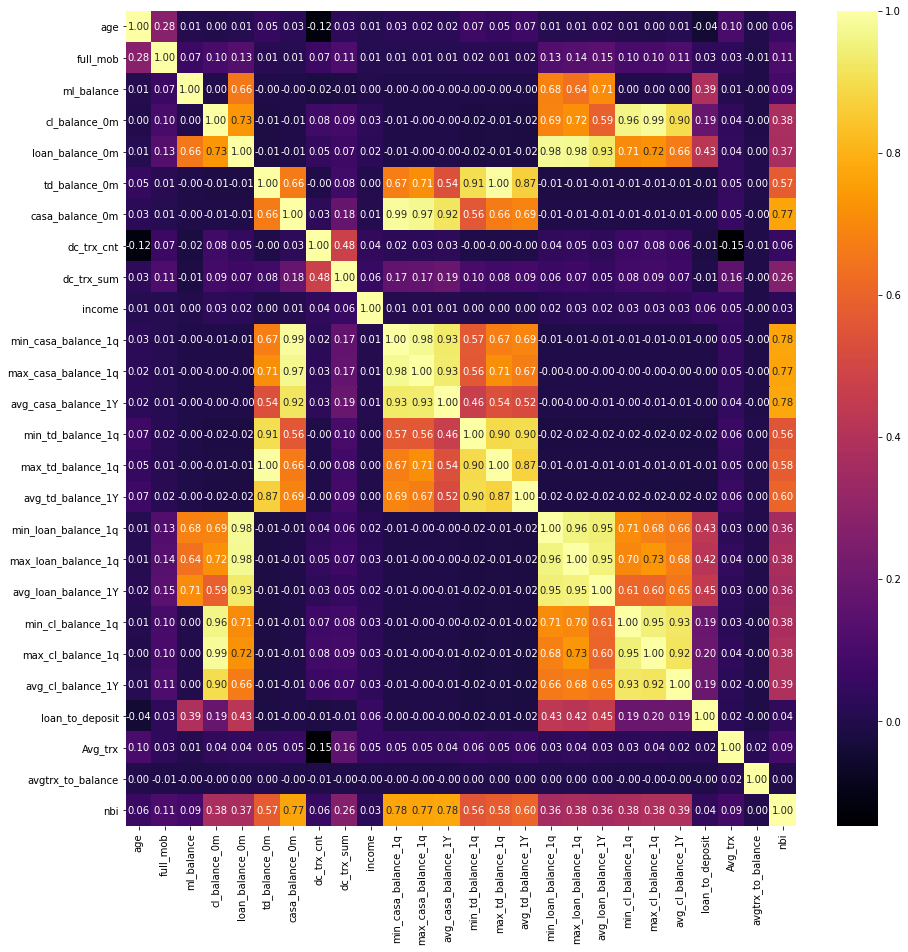

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="inferno",)
plt.show()

Сразу бросается в глаза:

1) Между признаками нет обратной корреляции

2) Есть сильная корреляция между признаками:

td_balance_0m
casa_balance_0m
min_casa_balance_1q
max_casa_balance_1q
avg_casa_balance_1Y
min_td_balance_1q
max_td_balance_1q
avg_td_balance_1Y

Используем для графиков один признак **avg_td_balance_1Y**, остальные удалим


3) Есть сильная корреляция между признаками

ml_balance
cl_balance_0m
loan_balance_0m
min_loan_balance_1q
max_loan_balance_1q
avg_loan_balance_1Y
min_cl_balance_1q
max_cl_balance_1q
avg_cl_balance_1Y
loan_to_deposit

Используем для графиков один признак **loan_balance_0m**, остальные удалим

4) У признака **nbi** есть довольно сильная корреляция со всеми признаками. То есть все увеличение признаков непосредственно влияет на доход от клиента


# Попробуем нарисовать все графики

In [10]:
typical_features = ['age', 
                    'gender', 
                    'city_type', 
                    'dc_trx_cnt',
                    'dc_trx_sum', 
                    'loan_balance_0m',
                    'avg_td_balance_1Y',
                    'full_mob',
                    'income',
                    'Avg_trx',
                    'avgtrx_to_balance',
                    'nbi']
df_for_plot = df.loc[:, typical_features]

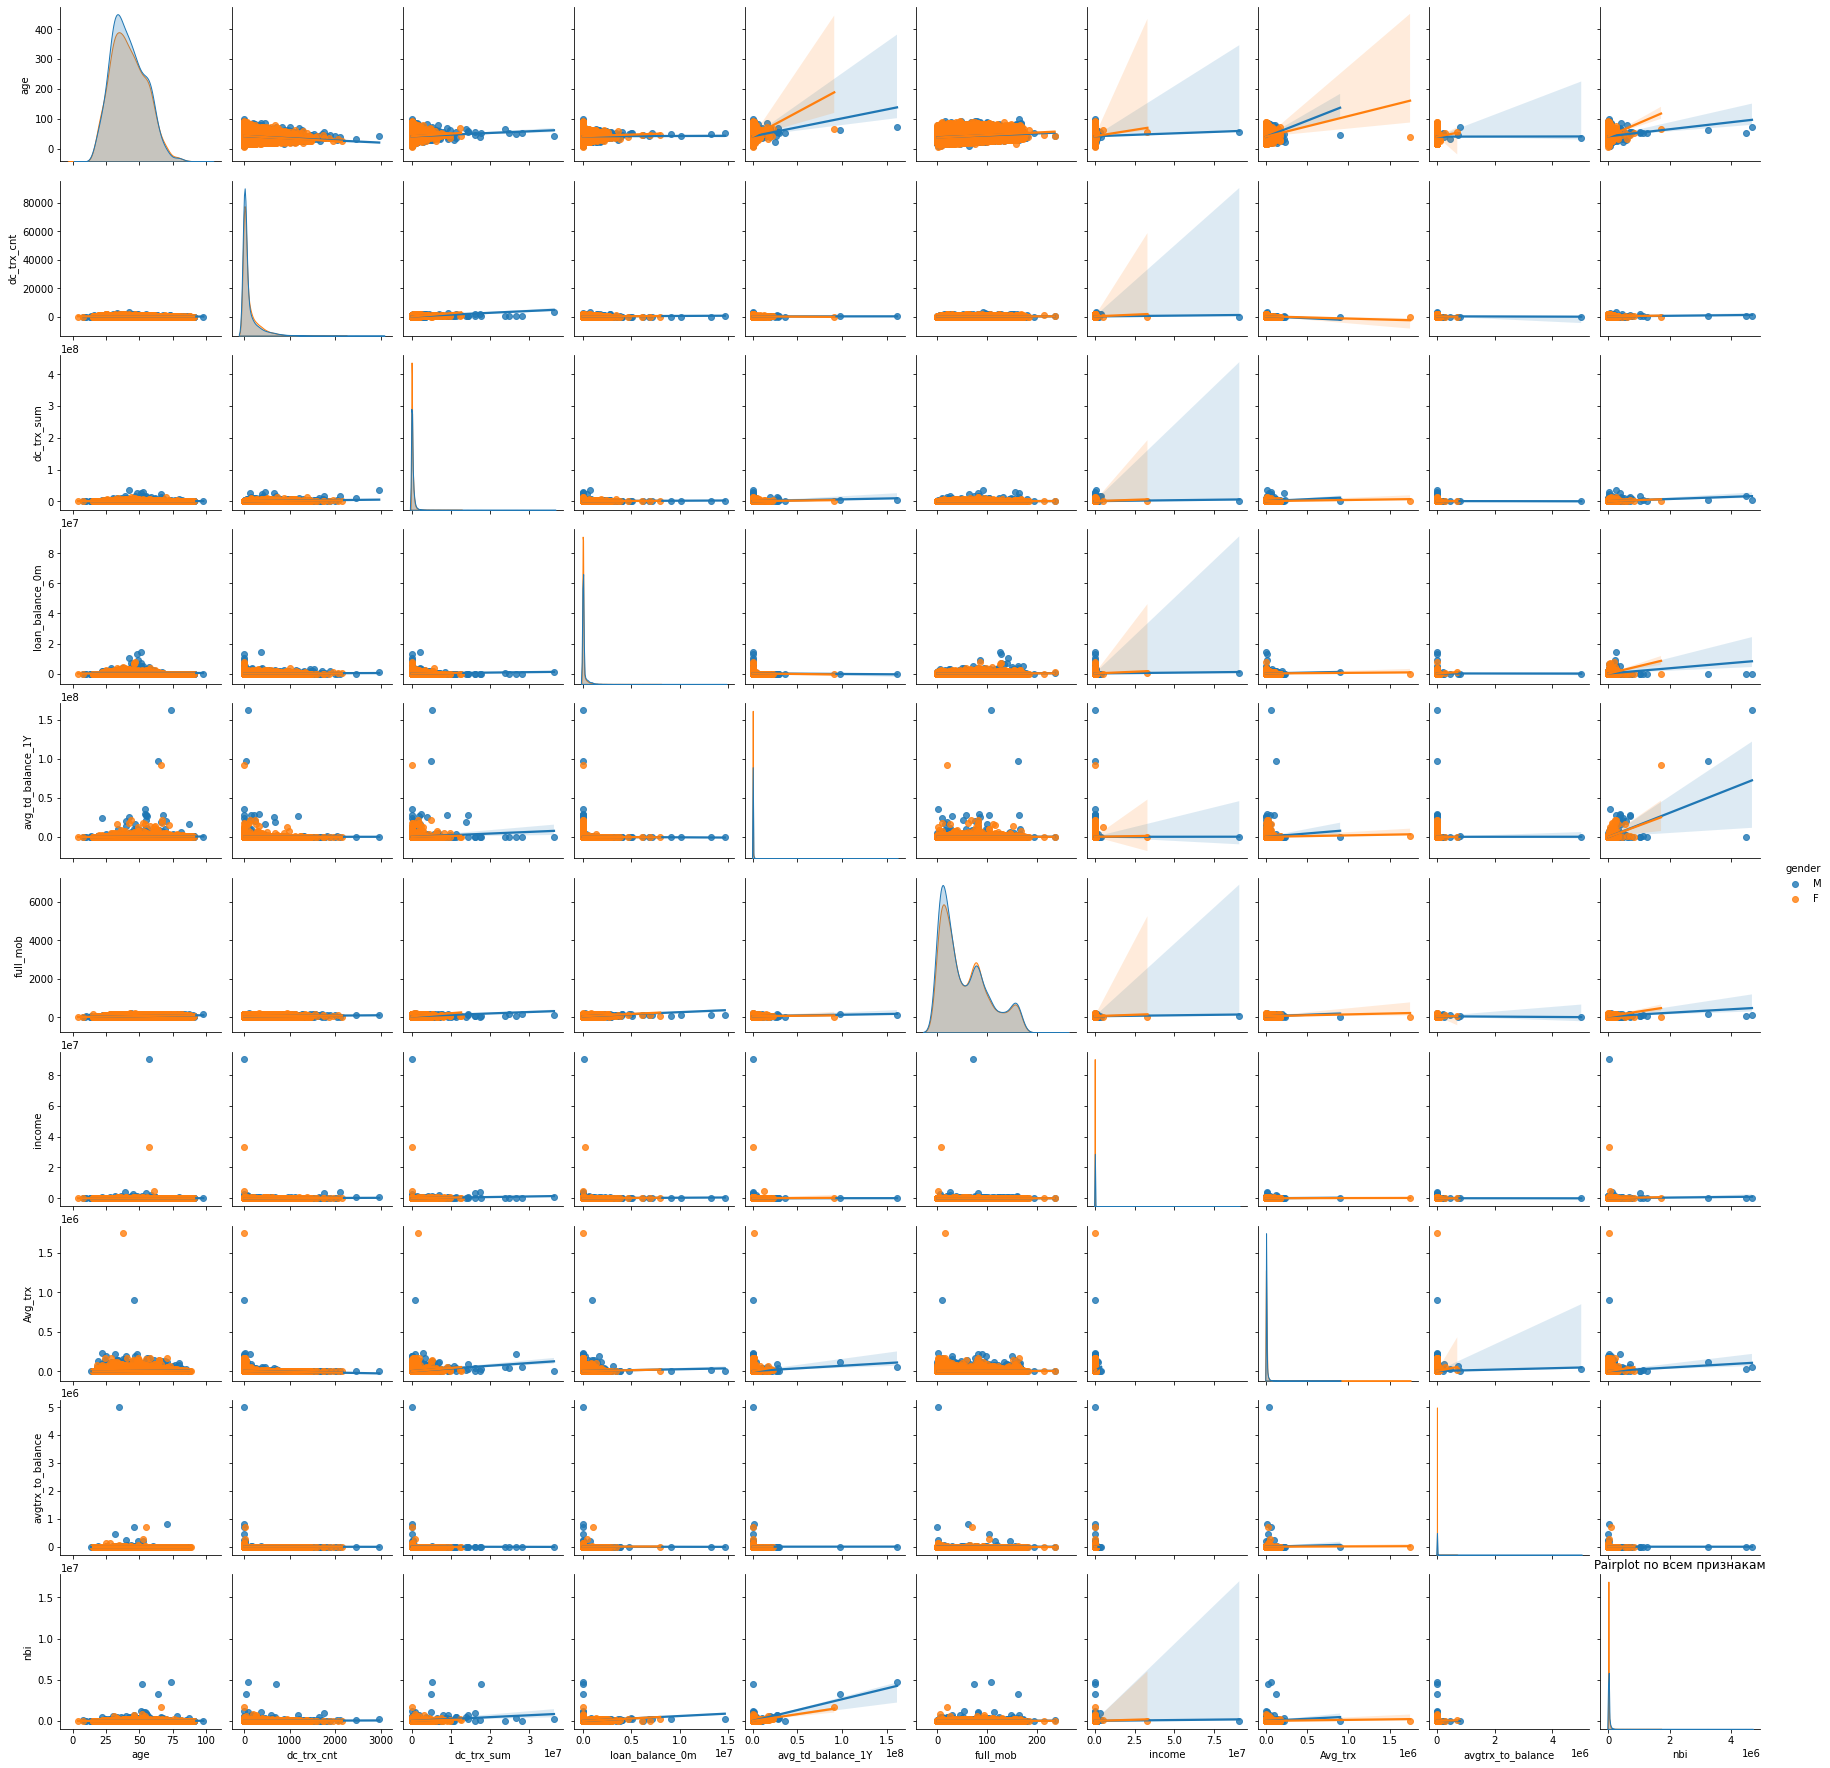

In [11]:
sns.pairplot(
    df_for_plot,
    hue='gender',
    kind='reg',
    diag_kws={'bw': 0.2}
)
plt.title('Pairplot по всем признакам')
plt.show()

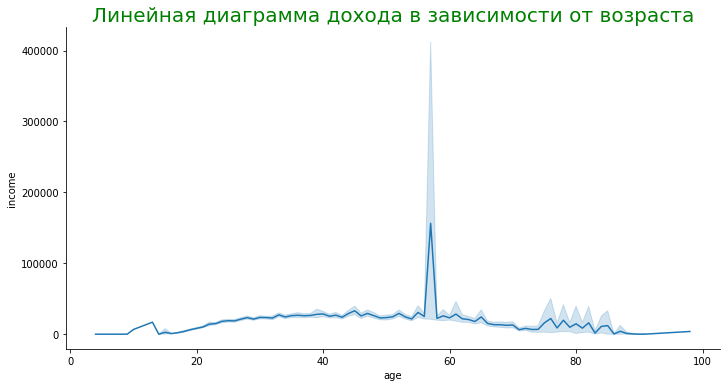

In [12]:
sns.relplot(
    y='income', 
    x='age', 
    data=df_for_plot, 
    kind='line', 
    aspect=20/10
)
plt.title('Линейная диаграмма дохода в зависимости от возраста', size=20, color='g')
plt.show()

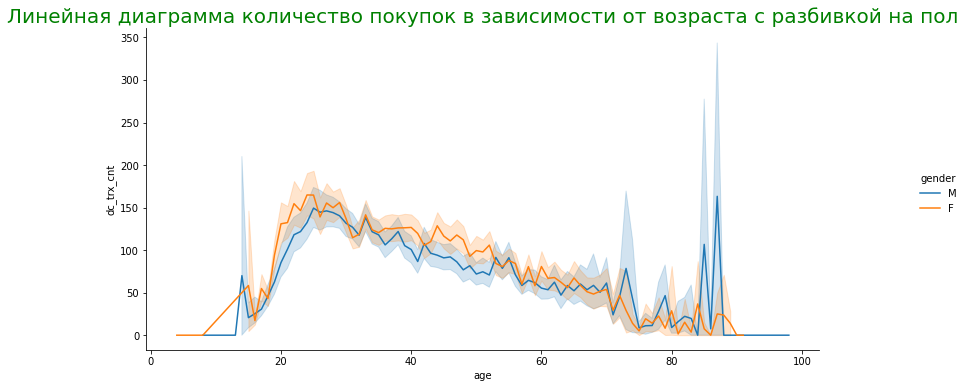

In [13]:
sns.relplot(
    x='age', 
    y='dc_trx_cnt', 
    hue='gender', 
    data=df_for_plot, 
    kind='line',
    aspect=20/10)
plt.title('Линейная диаграмма количество покупок в зависимости от возраста с разбивкой на пол', size=20, color='g');

<Figure size 720x648 with 0 Axes>

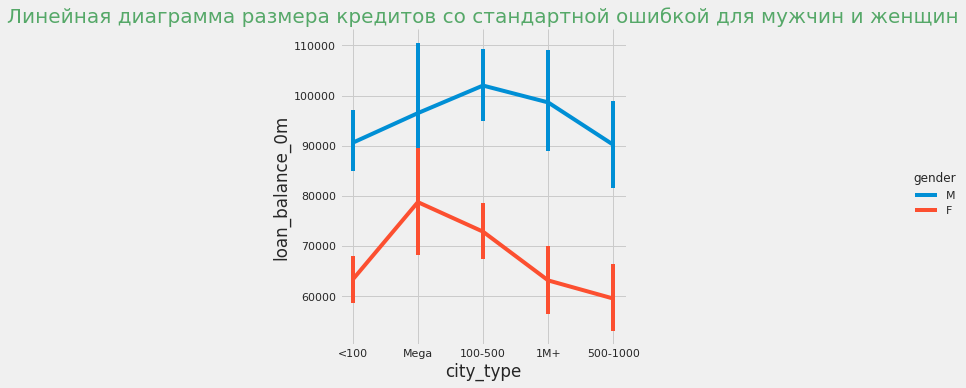

In [46]:
plt.figure(figsize=(10,9))
sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    hue='gender', 
    data=df_for_plot, 
    kind='line',
    err_style="bars", 
    ci=95)
plt.title('Линейная диаграмма размера кредитов со стандартной ошибкой для мужчин и женщин', size=20, color='g')
plt.show()

Text(0.5, 1.0, 'Линейная диаграмма avg_td_balance_1Y с разбивкой на тип города и пол')

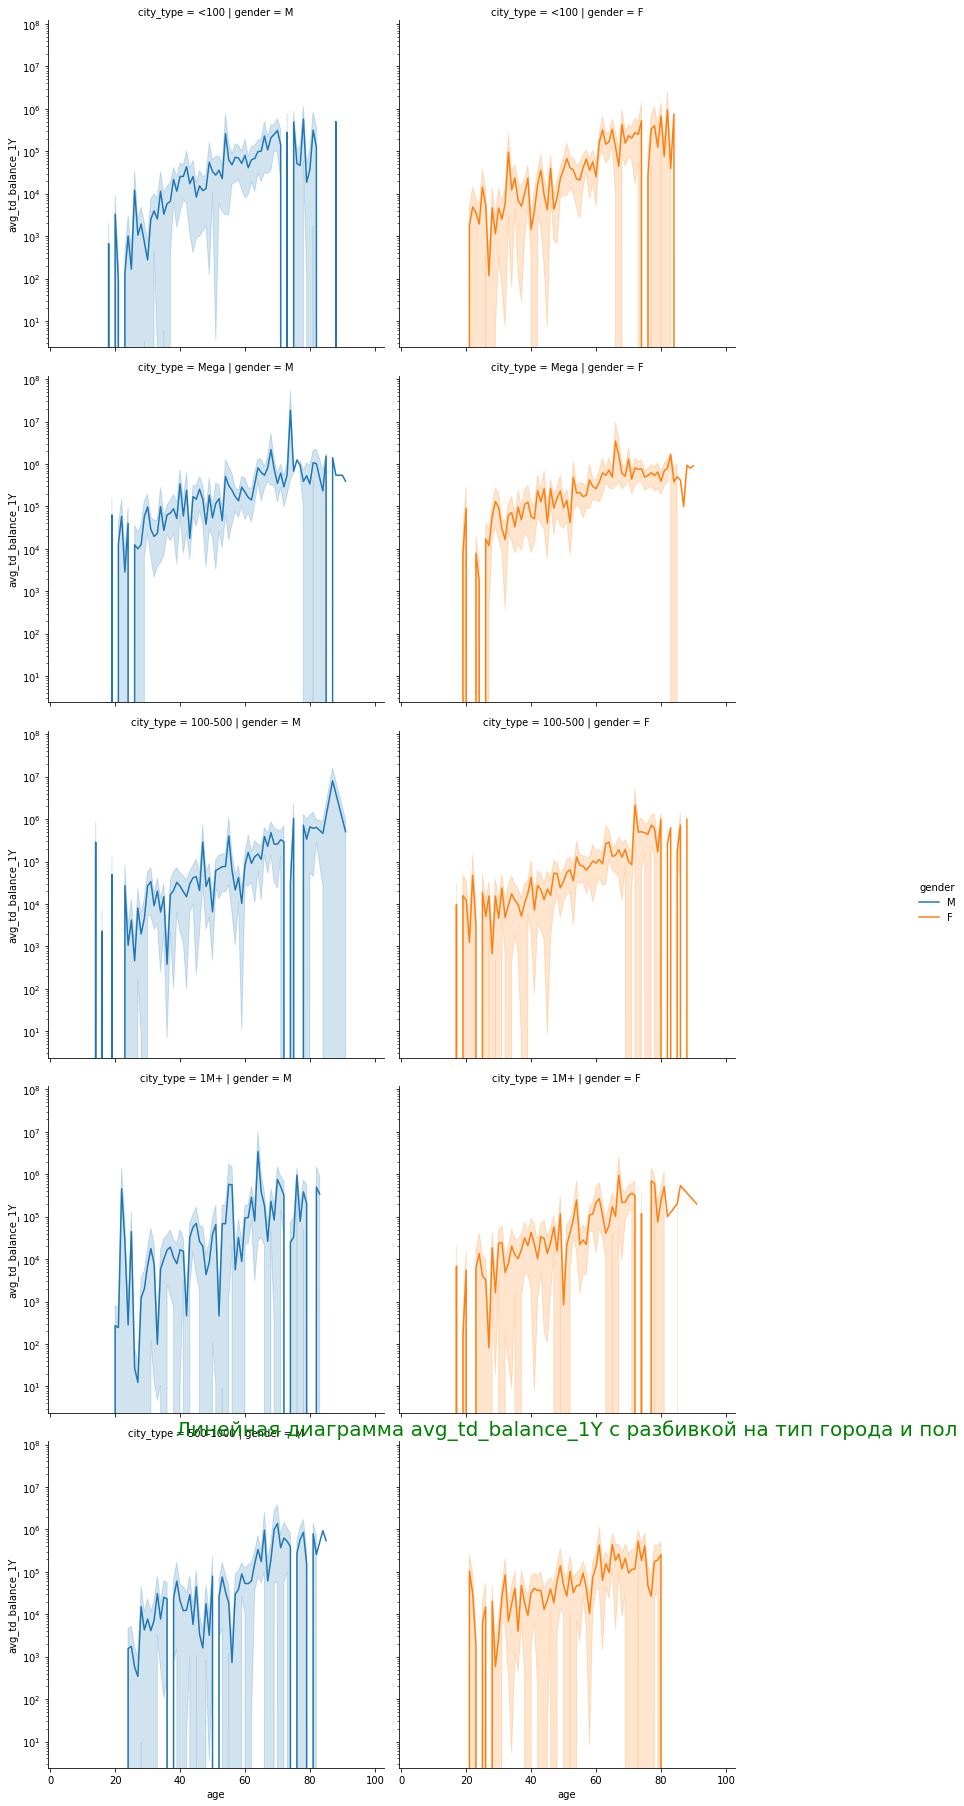

In [15]:
g = sns.relplot(
    x='age', 
    y='avg_td_balance_1Y', 
    data=df_for_plot, 
    kind='line', 
    hue='gender', 
    row='city_type', 
    col='gender').set(yscale='log')

plt.title('Линейная диаграмма avg_td_balance_1Y с разбивкой на тип города и пол', size=20, color='g')


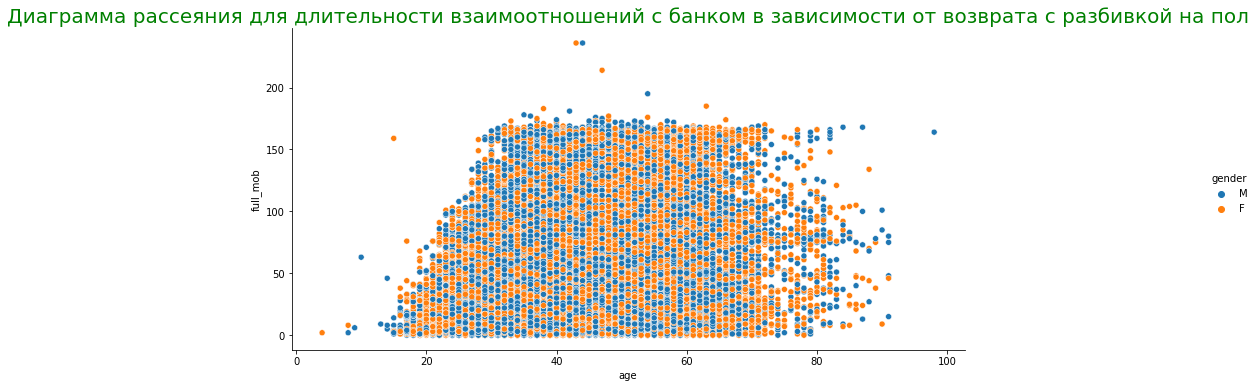

In [16]:
sns.relplot(
    x='age',
    y='full_mob',
    data=df_for_plot,
    kind='scatter',
    hue='gender',
    aspect=20/10,
)
plt.title('Диаграмма рассеяния для длительности взаимоотношений с банком в зависимости от возврата с разбивкой на пол', size=20, color='g');

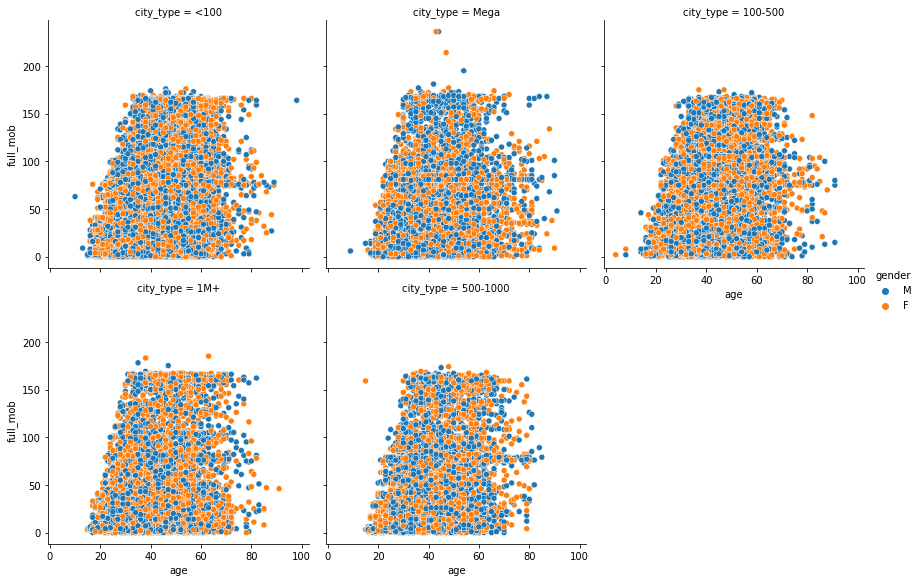

In [17]:
sns.relplot(
    x='age',
    y='full_mob',
    hue='gender',
    col='city_type',
    col_wrap=3,
    data=df_for_plot,
    height=4,

)
plt.show()

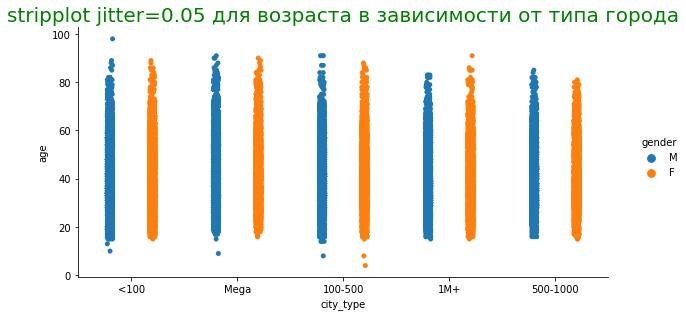

In [18]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df_for_plot, 
    hue='gender',
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
plt.title('stripplot jitter=0.05 для возраста в зависимости от типа города', size=20, color='g');

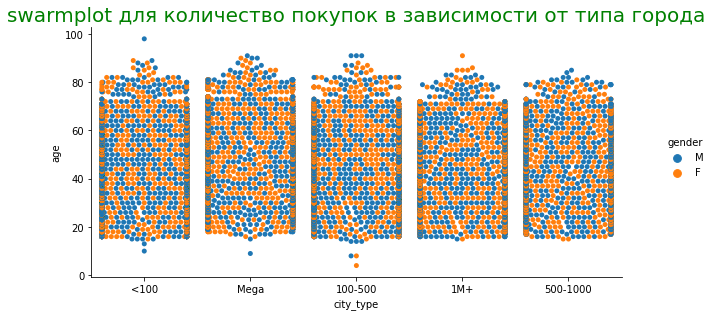

In [20]:
sns.catplot(
    x='city_type',
    y='age', 
    data=df_for_plot, 
    hue='gender',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot для возраста в зависимости от типа города', size=20, color='g');

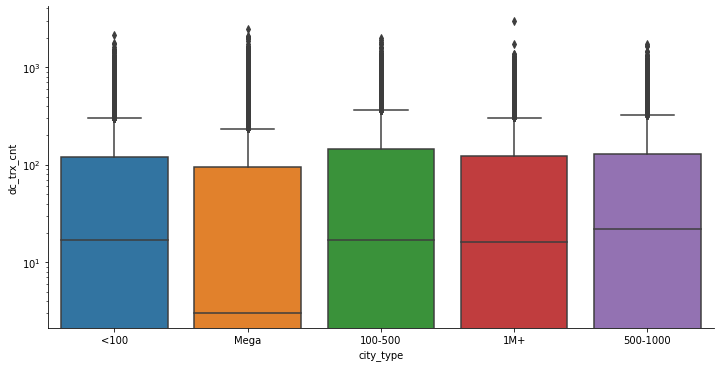

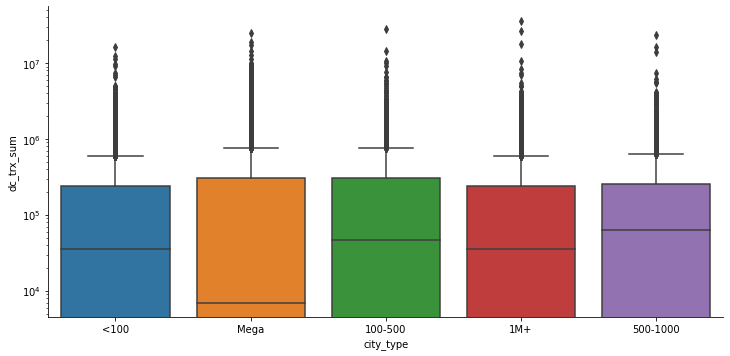

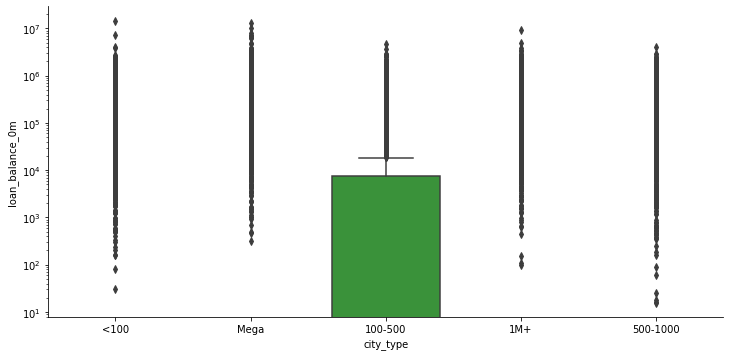

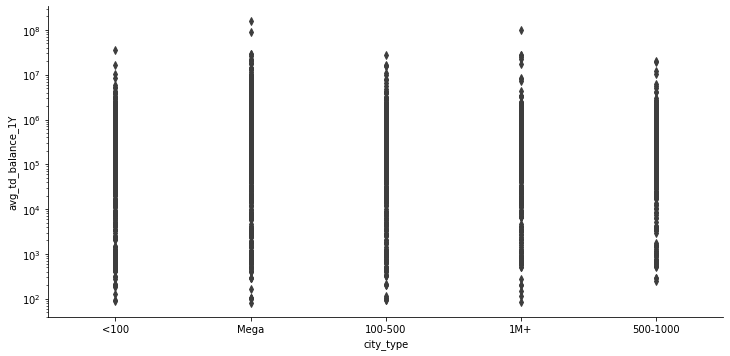

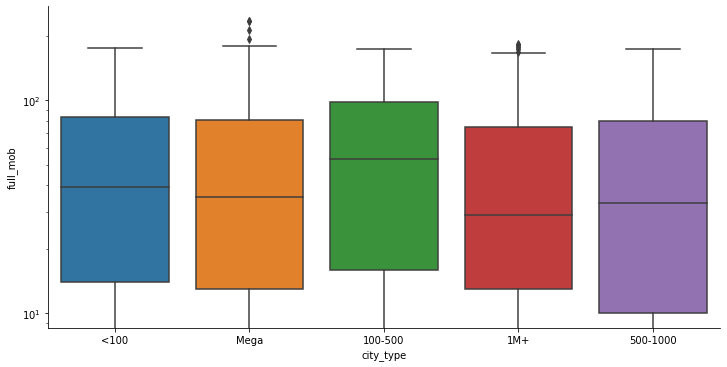

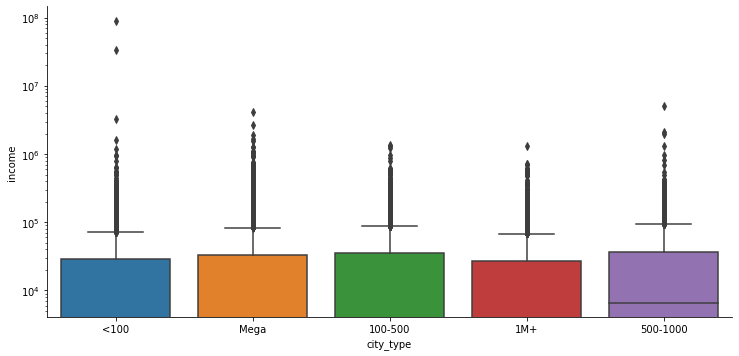

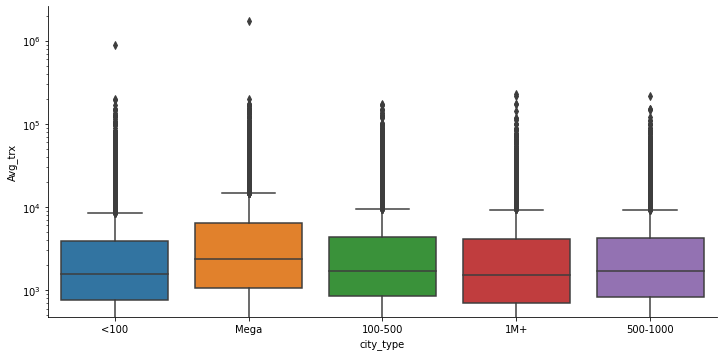

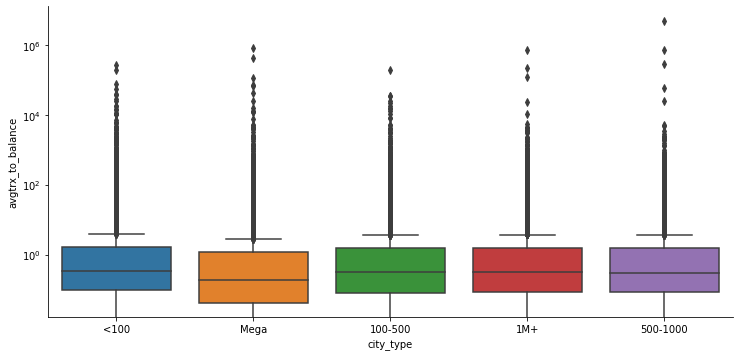

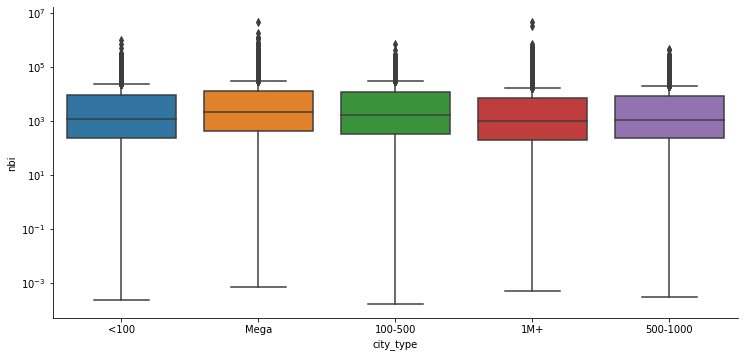

In [21]:
for feature in typical_features[3:]:
    sns.catplot(
        x='city_type', 
        y=feature, 
        data=df_for_plot, 
        kind='box', 
        height=5, 
        aspect=2
    ).set(yscale='log')
    plt.show()

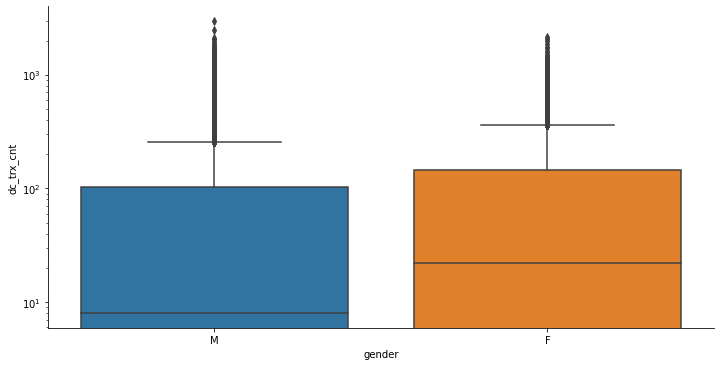

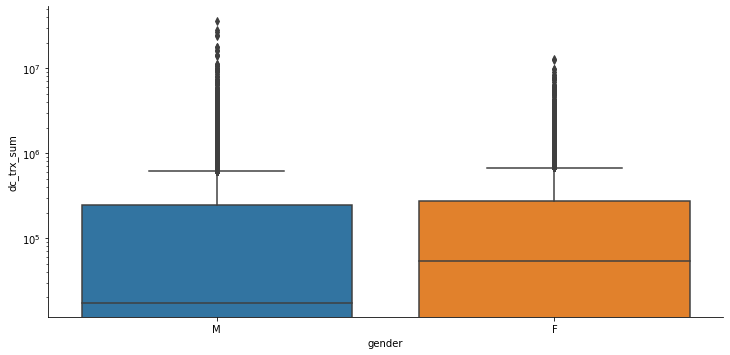

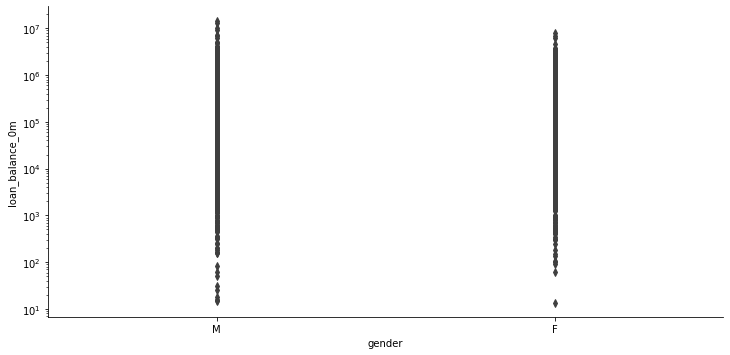

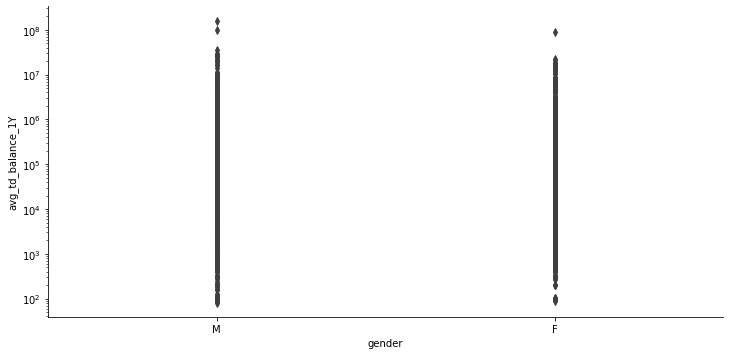

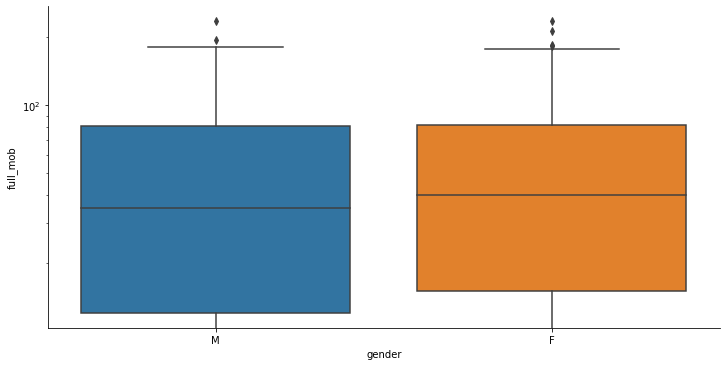

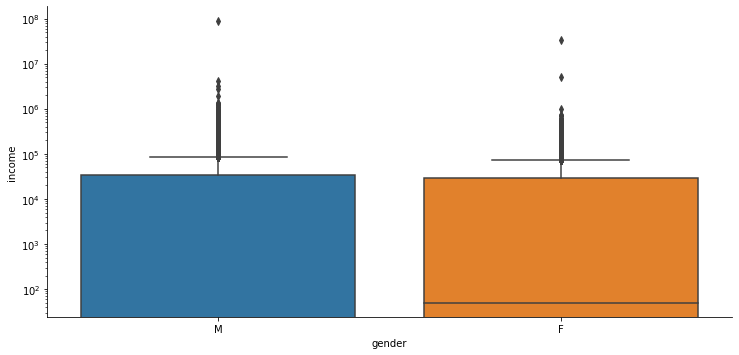

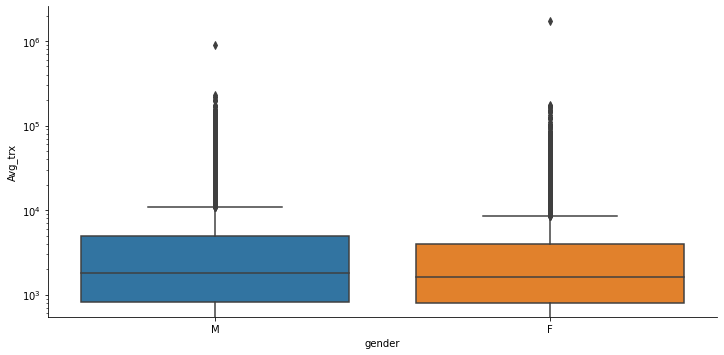

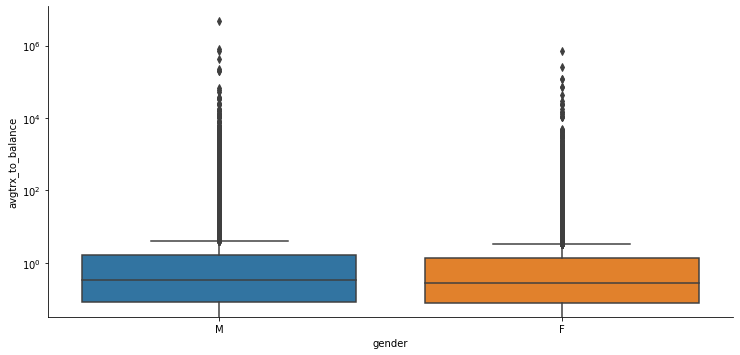

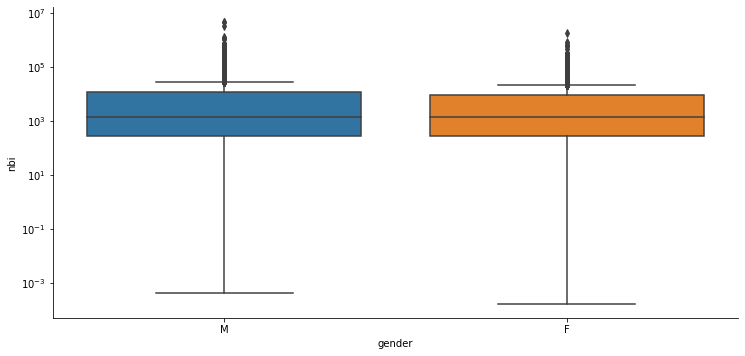

In [22]:
for feature in typical_features[3:]:
    sns.catplot(
        x='gender', 
        y=feature, 
        data=df_for_plot, 
        kind='box', 
        height=5, 
        aspect=2
    ).set(yscale='log')
    plt.show()

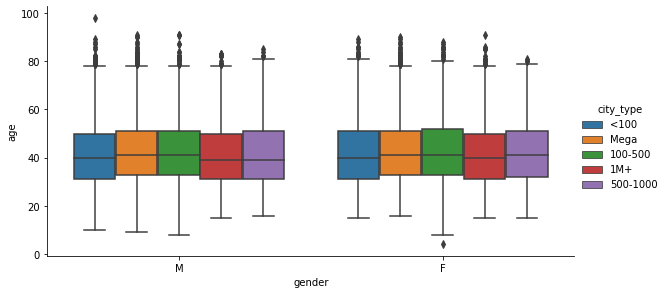

In [23]:
sns.catplot(
    x='gender', 
    y='age', 
    data=df_for_plot, 
    kind='box', 
    hue='city_type',
    height=4, 
    aspect=2); 

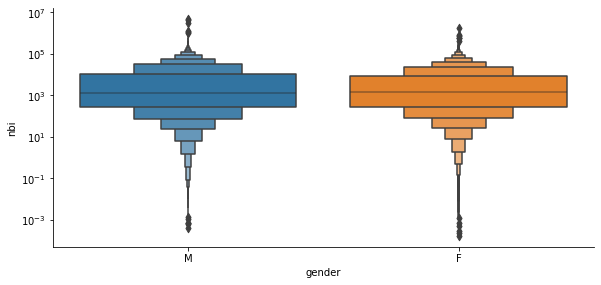

In [24]:
sns.catplot(
    x='gender', 
    y='nbi', 
    data=df_for_plot, 
    kind='boxen', 
    height=4, 
    aspect=2).set(yscale='log')

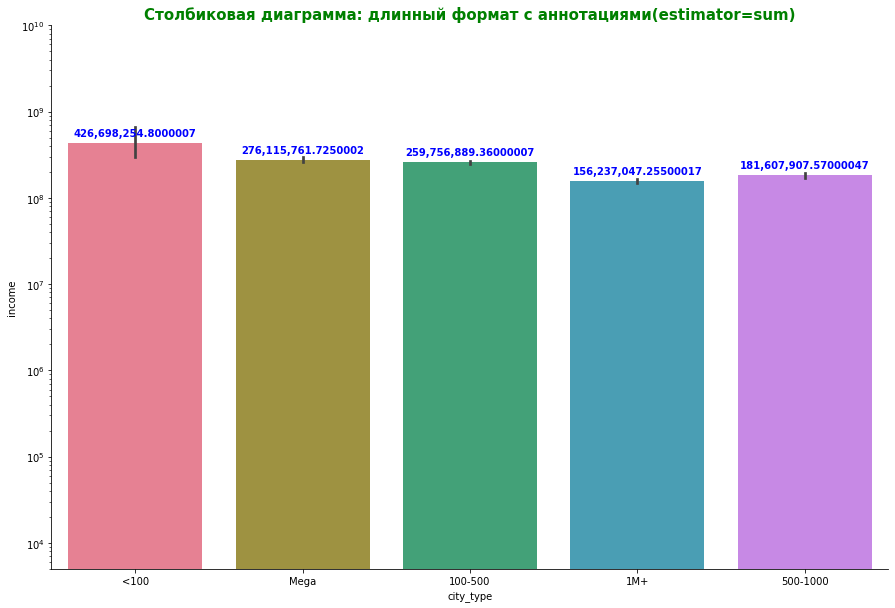

In [25]:
plt.figure(figsize=(15,10))
b = sns.barplot(
    x='city_type', 
    y='income', 
    data=df_for_plot, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[5000, 10000000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

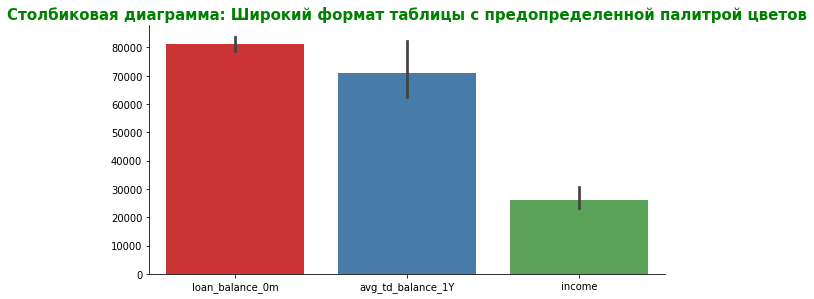

In [26]:
sns.catplot(
    data=df_for_plot, 
    kind='bar', 
    height=4, 
    aspect=2,
    order=['loan_balance_0m', 'avg_td_balance_1Y', 'income'],
    palette="Set1"
)
plt.title('Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g', 
          weight='bold');

Text(0.5, 1.0, 'Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)')

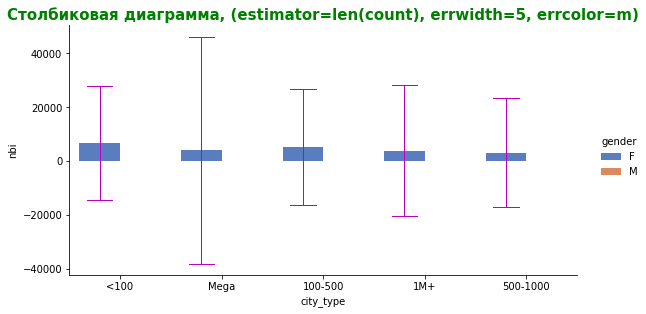

In [27]:
sns.catplot(
    x='city_type', 
    y='nbi', 
    data=df_for_plot, 
    kind='bar', 
    hue='gender', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    hue_order=['F','M'], 
    palette="muted", 
    height=4, 
    aspect=2)
plt.title('Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15, 
          color='g', 
          weight='bold'
         )

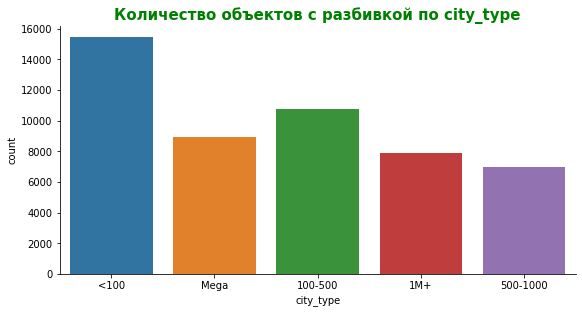

In [28]:
sns.catplot(x='city_type', 
            data=df_for_plot, 
            kind='count', 
            height=4, 
            aspect=2
           )
plt.title('Количество объектов с разбивкой по city_type', size=15, color='g', weight='bold');

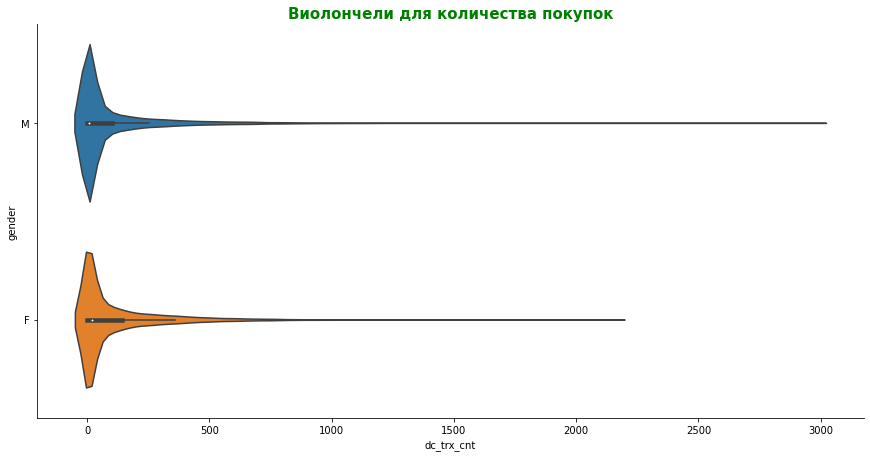

In [29]:
sns.catplot(
    x='dc_trx_cnt',
    y='gender',
    data=df_for_plot,
    kind='violin',
    height=6,
    aspect=2)
plt.title('Виолончели для количества покупок', size=15, color='g', weight='bold');

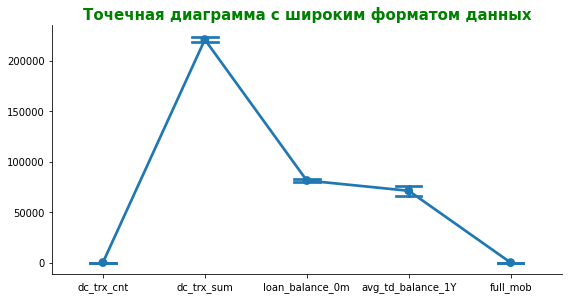

In [30]:
sns.catplot(
    data=df_for_plot, 
    kind='point', 
    ci=68, 
    capsize=0.25, 
    height=4, 
    aspect=2, 
    order=['dc_trx_cnt','dc_trx_sum', 'loan_balance_0m','avg_td_balance_1Y','full_mob']
)
plt.title('Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

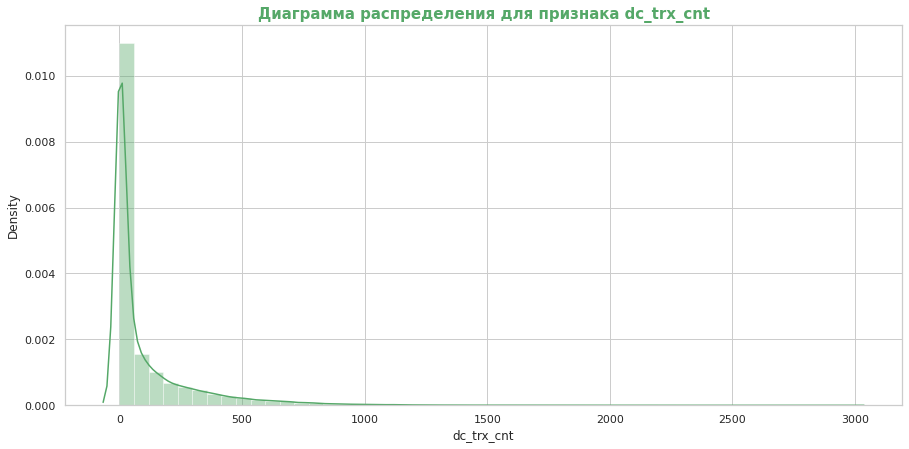

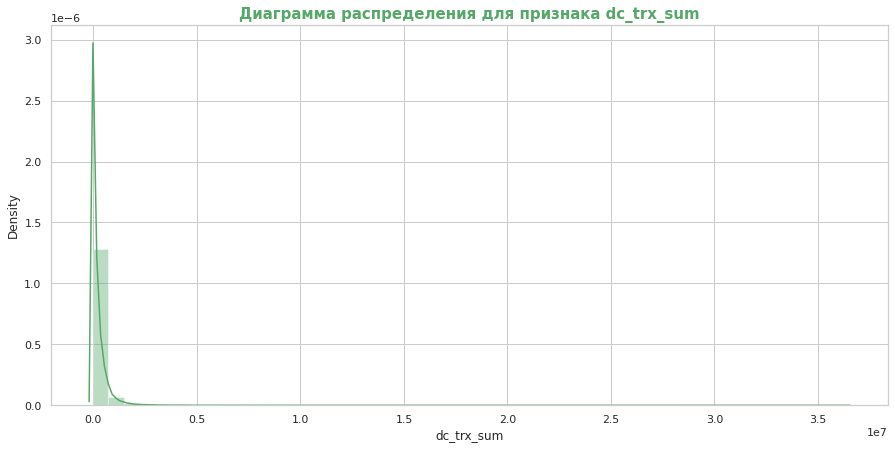

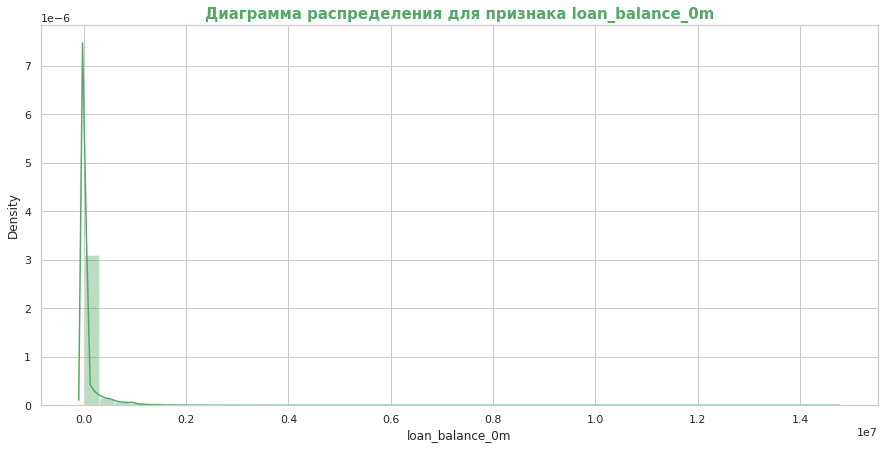

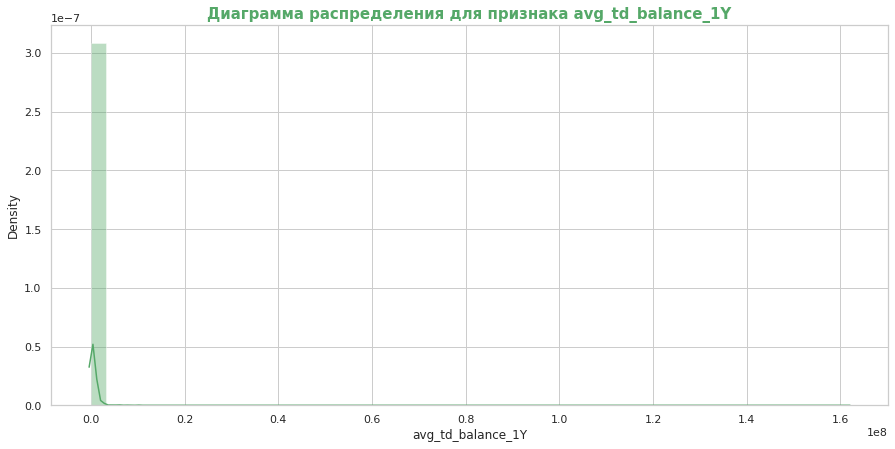

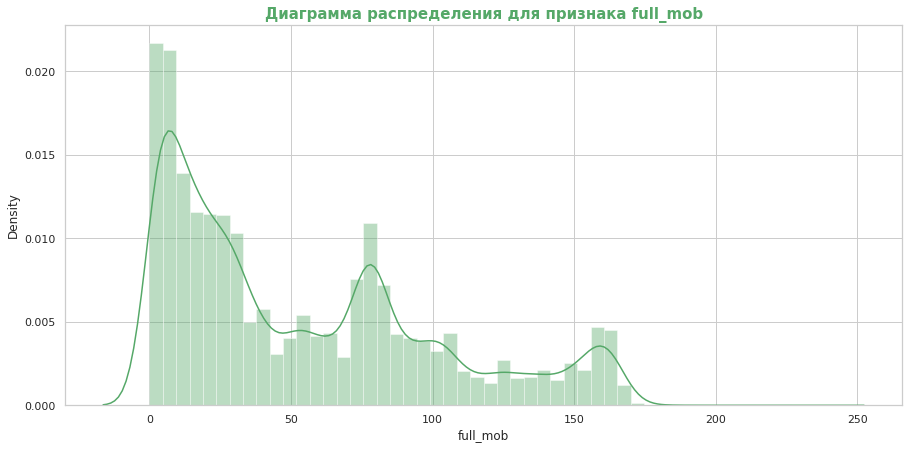

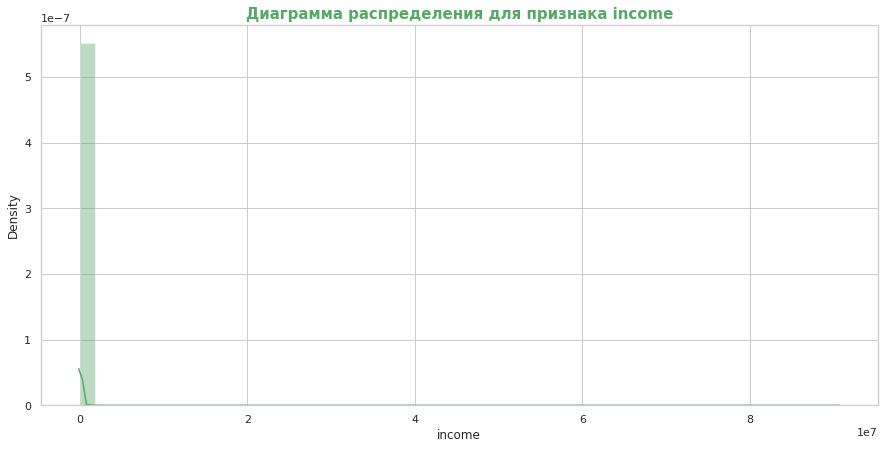

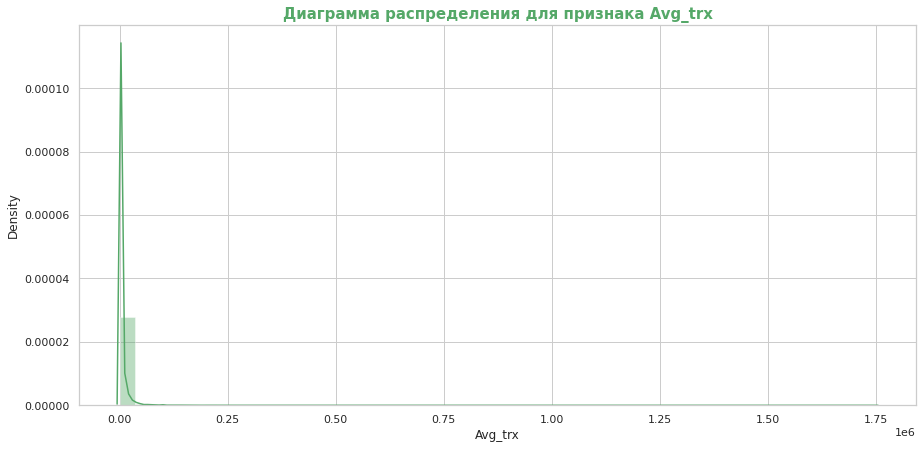

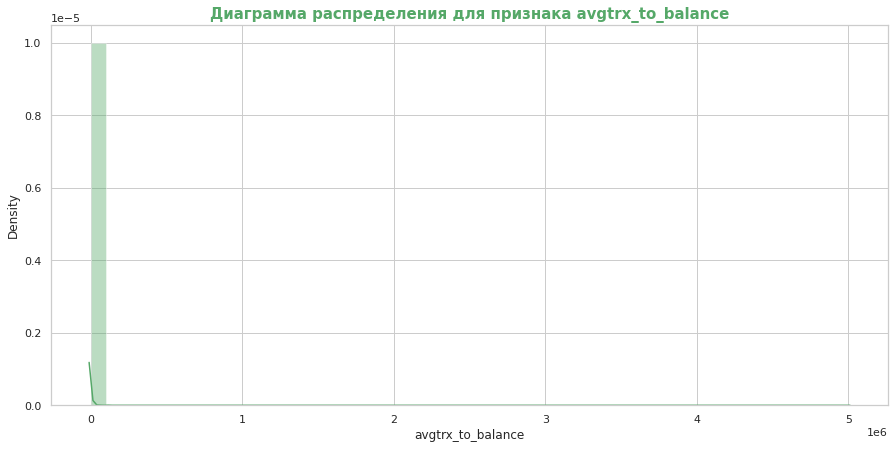

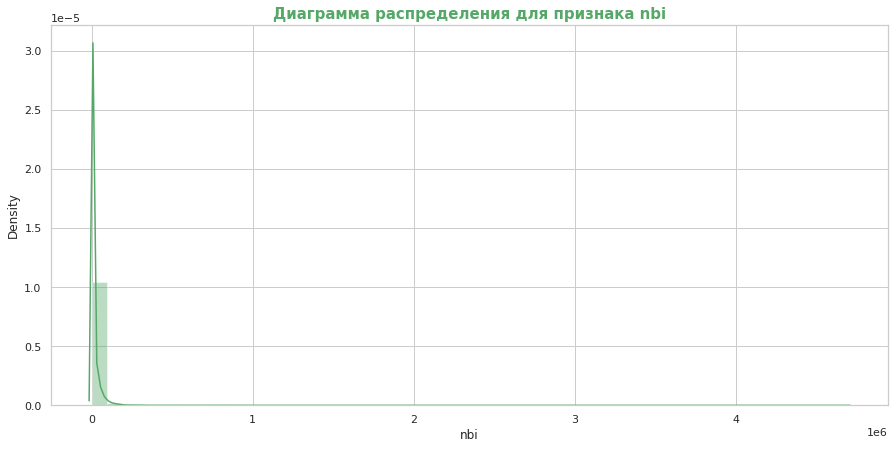

In [31]:
sns.set(style='whitegrid', color_codes=True)
for feature in typical_features[3:]:
    plt.figure(figsize=(15,7))
    sns.distplot(
        df_for_plot[feature],
        color='g'
    )
    plt.title(f'Диаграмма распределения для признака {feature}', size=15, color='g', weight='bold')
    plt.show();

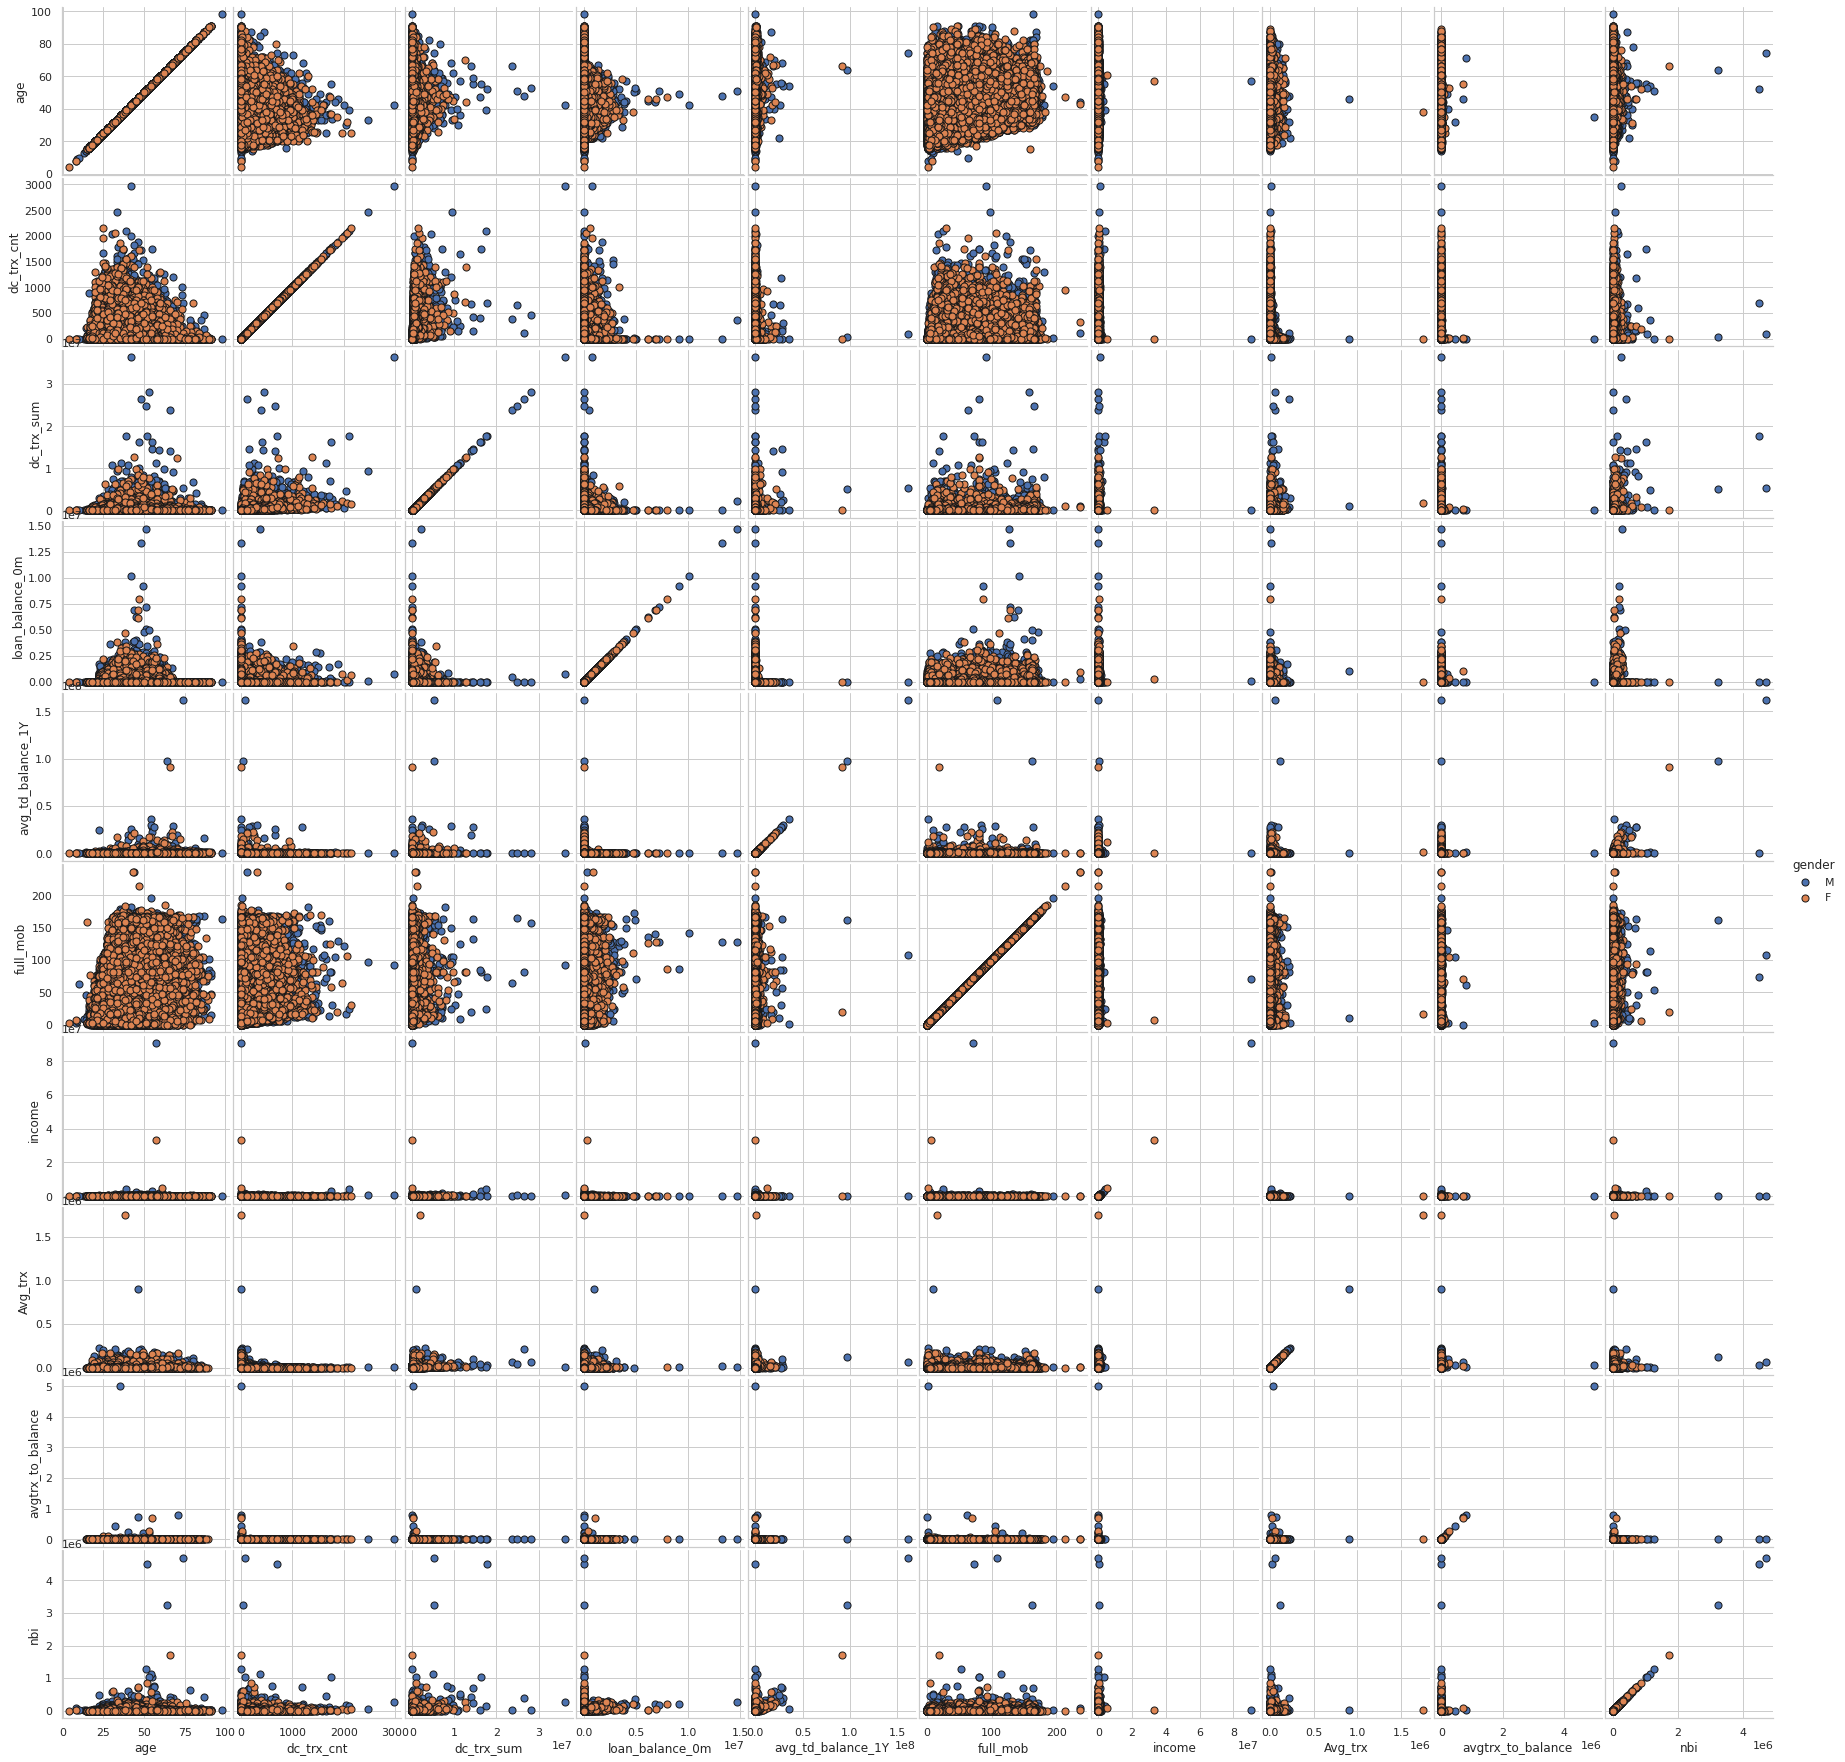

In [32]:
g = sns.PairGrid(
    df_for_plot, 
    hue='gender', 

)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

# Попробуем определить количество кластеров

Для определения оптимального количества кластеров будем использовать SSE - сумму квадратов расстояний по всем объектам до центра их кластера. Чем меньше значение, тем лучше проведена кластеризация.

Отмасштабируем признаки при помощи StandartScaler

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['gender', 'city_type'], axis=1).fillna(0))

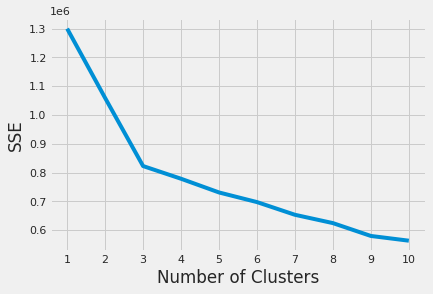

In [34]:
sse = []
kmeans_kwargs = {"init": "random",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Визуально видно, что на график SSE сильно меняется на 3 и 9 кластерах.

Посчитаем 3 кластера, чтобы сильно не усложнять работу

In [35]:
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=42)

kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_

Посмотрим на долю объектов в кластерах

In [36]:
df.Cluster.value_counts()

2    46611
0     3385
1        4
Name: Cluster, dtype: int64

Посмотрим на описание объектов в каждом кластере

In [37]:
df_cluster_0 = df[df.Cluster == 0]
df_cluster_0.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,Cluster
count,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,80.000000,2173.000000,2166.000000,3367.000000,3385.000000
mean,41.533530,70.786115,152606.879601,656230.897270,851869.483598,3574.054544,31563.763731,148.696307,377531.490510,99018.820292,15287.257240,55424.070600,31571.434532,2877.623253,4442.563755,4733.117980,803211.741539,900445.448066,765888.313515,612578.209164,690443.259799,558979.220509,646.811232,7360.360236,355.658466,71514.667833,0.000000
std,9.699785,48.894079,690713.905054,410570.630952,693212.527309,105272.228244,159585.722762,259.792802,1018476.959013,1659607.743476,89178.226556,197777.052978,108947.430073,96082.790661,119433.008920,108491.370267,691547.234053,714601.771403,704944.044103,396146.944343,420009.769380,337715.382135,1713.458533,24354.398903,15158.649106,50210.186077,0.000000
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107579,0.000000,0.000000,0.018987,0.000000
25%,34.000000,26.000000,0.000000,430974.840000,493529.570000,0.000000,162.070000,0.000000,0.000000,0.000000,42.480000,860.730000,1388.975833,0.000000,0.000000,0.000000,469589.010000,522091.980000,442452.842500,410303.150000,453111.800000,370335.036670,6.624563,1055.488333,0.054494,41242.751798,0.000000
50%,41.000000,71.000000,0.000000,581033.870000,694789.190000,0.000000,1276.950000,8.000000,33422.430000,45200.000000,464.270000,11776.520000,6808.219167,0.000000,0.000000,0.000000,643871.390000,735649.250000,606624.717500,546415.250000,614631.250000,510781.019170,79.916305,2188.891180,0.176919,61495.883312,0.000000
75%,49.000000,104.000000,0.000000,849799.110000,982232.480000,0.000000,15240.750000,203.000000,515036.180000,77370.000000,5442.380000,36130.570000,23117.412500,0.000000,0.000000,0.000000,951710.910000,1019901.850000,909231.252500,812472.780000,884016.960000,746052.822500,534.585360,5426.792075,0.926294,90130.219289,0.000000
max,67.000000,236.000000,14675680.030000,7354567.620000,14675680.030000,5598161.410000,5371808.410000,2970.000000,36341047.713000,90600000.000000,3227889.390000,5371808.410000,2976143.702500,5186447.660000,5598161.410000,4279547.870000,14675680.030000,14811994.850000,15023911.284000,5646888.180000,7501889.260000,4112822.764200,12521.279170,900000.000000,704210.526320,1263725.351100,0.000000


In [38]:
df_cluster_1 = df[df.Cluster == 1]
df_cluster_1.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,Cluster
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
mean,64.000000,90.500000,0.000000,0.000000,0.000000,108525000.000000,165959853.615000,207.250000,6990641.045375,92776.435000,164574950.085000,260331104.027500,172170235.058500,59215000.000000,113580000.000000,87603635.416500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68218.265395,0.000506,3536047.058025,1.000000
std,9.092121,60.102690,0.000000,0.000000,0.000000,155833786.986862,63588926.842062,331.611595,7550905.292286,113486.010337,65177185.113457,155966963.150743,111299808.810129,69439476.524525,163801646.104875,66505048.560735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46638.289053,0.000563,1369430.532761,0.000000
min,52.000000,19.000000,0.000000,0.000000,0.000000,0.000000,111017260.090000,0.000000,0.000000,0.000000,106127163.490000,115940606.320000,63878275.094000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25245.866204,0.000081,1721341.370200,1.000000
25%,61.000000,59.500000,0.000000,0.000000,0.000000,0.000000,117854889.280000,32.250000,3799509.375000,0.000000,116145226.990000,140086975.727500,93148944.978500,0.000000,0.000000,68499999.999750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43420.275997,0.000186,2861105.827375,1.000000
50%,65.000000,90.500000,0.000000,0.000000,0.000000,51800000.000000,152687389.440000,63.500000,5119983.053250,69843.500000,152362630.680000,239608107.945000,157241334.310000,51800000.000000,53485000.000000,94378333.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61594.685791,0.000291,3865525.670050,1.000000
75%,68.000000,121.500000,0.000000,0.000000,0.000000,160325000.000000,200792353.775000,238.500000,8311114.723625,162619.935000,200792353.775000,359852236.245000,236262624.390000,111015000.000000,167065000.000000,113481968.749750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89704.464991,0.000718,4540466.900700,1.000000
max,74.000000,162.000000,0.000000,0.000000,0.000000,330500000.000000,247447375.490000,702.000000,17722598.075000,231418.740000,247447375.490000,446167593.900000,310319996.520000,133260000.000000,347350000.000000,161657875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117814.244190,0.001145,4691795.521800,1.000000


In [39]:
df_cluster_2 = df[df.Cluster == 2]
df_cluster_2.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,min_td_balance_1q,max_td_balance_1q,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,Cluster
count,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,46611.000000,3737.000000,29952.000000,29346.000000,44198.000000,46611.000000
mean,41.521894,52.394671,2735.360460,17066.865718,25308.852111,65541.463452,57062.182181,101.830126,208773.236411,20700.393647,43914.627521,73183.684434,53255.459212,59407.037844,71703.440632,68433.111389,22494.236725,29811.809824,29029.032074,15114.643615,19686.419682,18773.729693,4.794958,5122.081799,337.217881,7205.121653,2.000000
std,13.064887,47.078647,39168.162501,61369.518159,81285.847384,672221.673238,810472.159731,186.470786,549879.222572,59418.514650,706514.673481,869361.294443,726719.886520,632995.696772,707107.880224,624746.489336,74941.900857,91696.219309,90722.269416,55094.698724,68072.197827,62342.000288,58.531042,15177.346467,30155.820822,21785.345559,0.000000
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000168,2.000000
25%,31.000000,13.000000,0.000000,0.000000,0.000000,0.000000,29.880000,0.000000,0.000000,0.000000,3.620000,204.820000,400.001250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,0.083123,234.430674,2.000000
50%,40.000000,35.000000,0.000000,0.000000,0.000000,0.000000,724.210000,14.000000,35080.000000,0.000000,200.629500,3410.000000,2842.805000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1681.310621,0.312930,1078.654849,2.000000
75%,51.000000,81.000000,0.000000,0.000000,0.000000,0.000000,8407.460000,119.000000,248178.730000,28211.800000,3505.275000,20445.380000,12325.882500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4347.145543,1.587469,6416.464026,2.000000
max,98.000000,236.000000,892400.250000,732492.240000,998471.050000,39500000.000000,65223175.923000,2470.000000,28225798.160000,5000000.000000,65223175.923000,65843099.719000,70509340.897000,39500000.000000,39500000.000000,36000000.000000,955640.450000,1850808.260000,2574897.867900,430884.450000,787008.750000,904338.779170,1743.944490,1749500.000000,5000000.000000,1128366.484800,2.000000


Проверим долю gender в кластерах

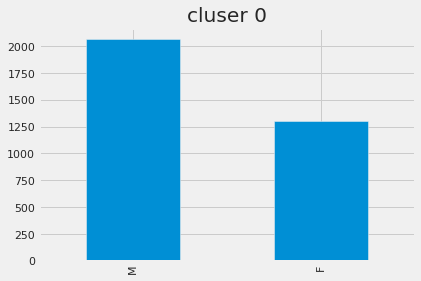

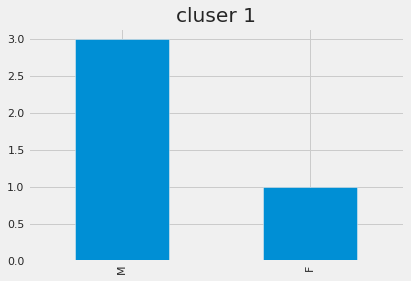

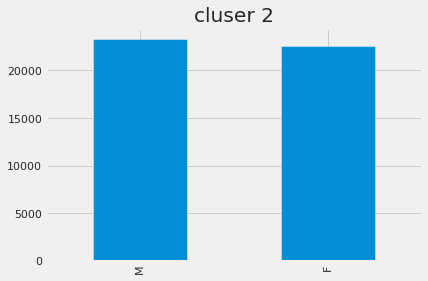

In [40]:
df_cluster_0.gender.value_counts().plot(kind='bar', title='cluser 0')
plt.show()
df_cluster_1.gender.value_counts().plot(kind='bar', title='cluser 1')
plt.show()
df_cluster_2.gender.value_counts().plot(kind='bar', title='cluser 2')
plt.show()

Проверим долю city_type в кластерах

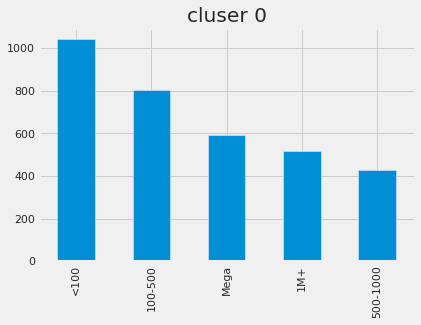

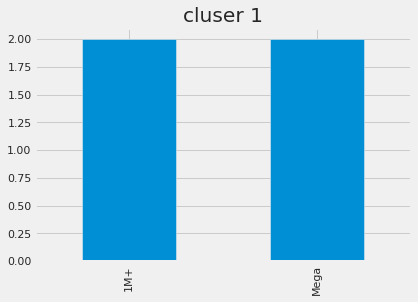

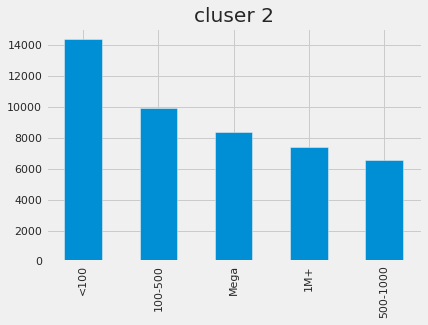

In [41]:
df_cluster_0.city_type.value_counts().plot(kind='bar', title='cluser 0')
plt.show()
df_cluster_1.city_type.value_counts().plot(kind='bar', title='cluser 1')
plt.show()
df_cluster_2.city_type.value_counts().plot(kind='bar', title='cluser 2')
plt.show()

Доли городских типов в кластере 0 и 2 практически не отличаются

Посмотрим на age в кластерах

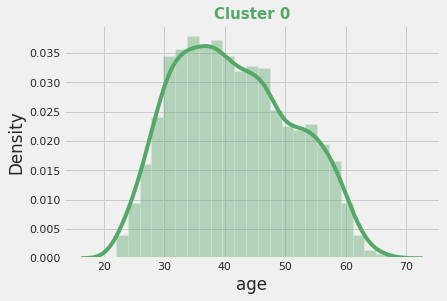

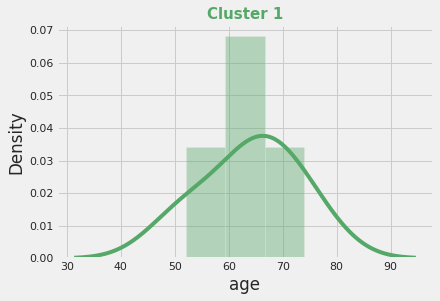

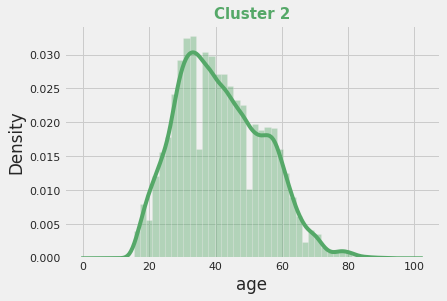

In [42]:
sns.distplot(
    df_cluster_0['age'],
    color='g')
plt.title('Cluster 0', size=15, color='g', weight='bold')
plt.show()
sns.distplot(
    df_cluster_1['age'],
    color='g')
plt.title('Cluster 1', size=15, color='g', weight='bold')
plt.show();
sns.distplot(
    df_cluster_2['age'],
    color='g')
plt.title('Cluster 2', size=15, color='g', weight='bold')
plt.show();

# Описание кластеров

1. **Кластер 0**

- Название: "Средний класс"
- Количество: 3385 объектов
- Средний доход(income): 99018 
- Средний доход для компании от одного клиента: 71514
- Пол: 61% мужчины, 39% женщины
- Среднее значение ипотеки (ml_balance): 152606
- Среднее значение потреб кредитов (cl_balance_0m): 656230
- Среднее значение по депозиту (td_balance_0m): 3574
- Среднее значение сумм трат по картам (dc_trx_sum): 377531

**Описание:** Кластер с высоким средним доходом, большим размером ипотеки и потребительских кредитов, с очень скромными суммами на депозитах. 

В кластере большая доля мужчин, что есть подтверждение гендерного неравенства в обществе.

2. **Кластер 1**

- Название: "Выбросы"
- Количество: 4 объекта

**Описание:** Нерепрезентативный кластер. Всего 4 объекта, нет кредитов, огромные суммы в депозитах

3. **Кластер 2**

- Название: "Основной рабочий класс"
- Количество: 46611 объектов
- Средний доход(income):  20700
- Средний доход для компании от одного клиента: 7205
- Пол: 50% мужчины, 50% женщины
- Среднее значение ипотеки (ml_balance): 2735
- Среднее значение потреб кредитов (cl_balance_0m): 17066
- Среднее значение по депозиту (td_balance_0m): 65541
- Среднее значение сумм трат по картам (dc_trx_sum): 208773

**Описание:** Кластер с самым большим количеством объектов, с небольшим средним доходом. Небольшой размер кредитов. Довольно большие суммы на депозитах. Распределение мужчин и женщин одинаковое. 